In [17]:
import numpy as np
import pandas as pd

#sklearn libraries
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold,cross_val_score

# Random Forest

In [3]:
abalone_df = pd.read_csv('abalone.csv',header=0)

In [8]:
abalone_df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
abalone_df['Sex'] = abalone_df['Sex'].map(lambda x:1 if x=='M' else (-1 if x=='F' else 0))

In [10]:
X_features =  abalone_df.iloc[:,:-1]
y_target = abalone_df['Rings']

In [11]:
X_features

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [27]:
kfold = KFold(n_splits=5,shuffle=True,random_state=1)

In [29]:
scores = []
for i in range(1,51):
    clf = RandomForestRegressor(n_estimators = i,random_state=1)
    score = cross_val_score(estimator = clf, X = X_features, y = y_target, cv=kfold, scoring='r2')
    scores.append(np.mean(score))

In [35]:
for index, score in enumerate(scores):
    if round(score,2) > 0.52:
        result = index+1
        break

In [36]:
with open('randomForest.txt', 'w', encoding = 'utf-8') as fout:
    print(result,file=fout,end='')

# Gradient boosting on decision trees

In [38]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
gbm_data = pd.read_csv('gbm-data.csv',header=0) #CSV = Comma Seperated Values

In [42]:
gbm_data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = gbm_data.iloc[:,1:].values
y = gbm_data['Activity'].values

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.8,
                                                random_state=241)

In [77]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

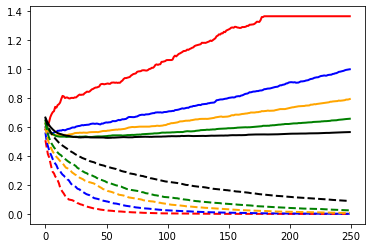

In [87]:
plt.figure()
best_rate = None
best_iter = None
min_loss = None
for rate,name,color in [(1,'max','red'),(0.5,'high','blue'),
                        (0.3,'medium','orange'),(0.2,'low','green'),
                        (0.1,'min','black')]:
    #"""We create and train the model"""
    clf = GradientBoostingClassifier(learning_rate=rate, n_estimators=250,verbose=False,random_state=241)
    clf.fit(X_train,y_train)
    #"""Here will we collect the loss at every iteration"""
    train_loss = np.zeros(clf.n_estimators_)
    test_loss = np.zeros(clf.n_estimators_)
    
    for t, y_pred in enumerate(clf.staged_decision_function(X_train)):
        y_prob = sigmoid(y_pred)
        train_loss[t] = log_loss(y_train,y_prob)
    for t, y_pred in enumerate(clf.staged_decision_function(X_test)):
        y_prob = sigmoid(y_pred)
        test_loss[t] = log_loss(y_test,y_prob)
        
    
    if best_rate == None:
        best_rate = rate
        best_iter = np.argmin(test_loss) + 1
        min_loss = test_loss[best_iter-1]
    elif test_loss.min() < min_loss:
        best_rate = rate
        best_iter = np.argmin(test_loss) + 1
        min_loss = test_loss[best_iter-1]
        
    plt.plot(test_loss, color=color, linestyle='solid',label=name+' test', linewidth=2)
    plt.plot(train_loss,color=color, linestyle='dashed',label=name+' train', linewidth=2)

In [92]:
print(min_loss,best_rate,best_iter)

0.5254924770369842 0.1 52


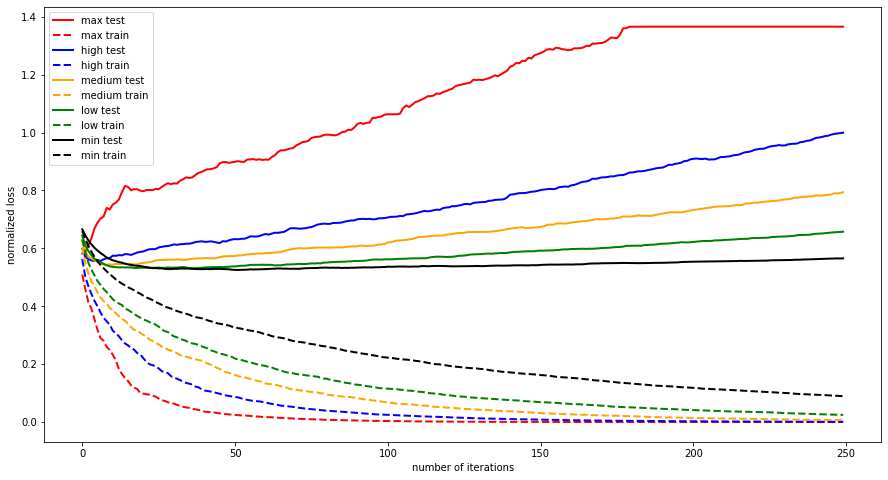

In [91]:
plt.figure(figsize=(15,8))
best_rate = None
best_iter = None
min_loss = None
for rate,name,color in [(1,'max','red'),(0.5,'high','blue'),
                        (0.3,'medium','orange'),(0.2,'low','green'),
                        (0.1,'min','black')]:
    #"""We create and train the model"""
    clf = GradientBoostingClassifier(learning_rate=rate, n_estimators=250,verbose=False,random_state=241)
    clf.fit(X_train,y_train)
    #"""Here will we collect the loss at every iteration"""
    train_loss = np.zeros(clf.n_estimators_)
    test_loss = np.zeros(clf.n_estimators_)
    
    for t, y_prob in enumerate(clf.staged_predict_proba(X_train)):
        train_loss[t] = log_loss(y_train,y_prob)
    for t, y_prob in enumerate(clf.staged_predict_proba(X_test)):
        test_loss[t] = log_loss(y_test,y_prob)
        
    """
    for t, y_pred in enumerate(clf.staged_decision_function(X_train)):
        y_prob = sigmoid(y_pred)
        train_loss[t] = log_loss(y_train,y_pred)
    for t, y_pred in enumerate(clf.staged_decision_function(X_test)):
        y_prob = sigmoid(y_pred)
        test_loss[t] = log_loss(y_test,y_pred)
    """
    
    
    if best_rate == None:
        best_rate = rate
        best_iter = np.argmin(test_loss) + 1
        min_loss = test_loss[best_iter-1]
    elif test_loss.min() < min_loss:
        best_rate = rate
        best_iter = np.argmin(test_loss) + 1
        min_loss = test_loss[best_iter-1]
        
    plt.plot(test_loss, color=color, linestyle='solid',label= name+' test', linewidth=2)
    plt.plot(train_loss,color=color, linestyle='dashed',label= name+' train', linewidth=2)
    plt.legend(loc='upper left')
    plt.ylabel('normalized loss')
    plt.xlabel('number of iterations')

In [102]:
with open('randforest1.txt','w',encoding='utf-8') as fout:
    print('overfitting',file=fout,end='')

# Learning rate = 0.2

In [94]:
# MODEL CREATION
clf = GradientBoostingClassifier(learning_rate=0.2, n_estimators=250,verbose=False,random_state=241)
clf.fit(X_train,y_train) 

# Loss per iteration
test_loss = np.zeros(clf.n_estimators_)

In [96]:
for t, y_prob in enumerate(clf.staged_predict_proba(X_test)):
        test_loss[t] = log_loss(y_test,y_prob)

In [97]:
# Optimal parameters
best_iter = np.argmin(test_loss) + 1
min_loss = test_loss[best_iter-1]

In [99]:
with open('randforest2.txt','w',encoding='utf-8') as fout:
    print(round(min_loss,2),best_iter,file=fout, end='')

# RandomForestClassifier

In [101]:
rfClf = RandomForestClassifier(n_estimators=37,random_state=241)
rfClf.fit(X_train,y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=37,
                       n_jobs=None, oob_score=False, random_state=241,
                       verbose=0, warm_start=False)

In [104]:
y_rfpredict = rfClf.predict_proba(X_test)

In [ ]:
with open('randforest3.txt','w',encoding='utf-8') as fout:
    print(round(log_loss(y_test,y_rfpredict),2),file=fout, end='')
